# Data inspection

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np
from collections import Counter
from wordcloud import WordCloud
from collections import defaultdict, Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

## Loading the Dataset

In [15]:
data_path = "../../Data/arxiv_train.csv"

df = pd.read_csv(data_path)
df.head()

,Unnamed: 0,abstract,label
0,31716,Automatic meeting analysis is an essential f...,eess
1,89533,We propose a protocol to encode classical bi...,quant-ph
2,82700,A number of physically intuitive results for...,quant-ph
3,78830,In the last decade rare-earth hexaborides ha...,physics
4,94948,We introduce the weak barycenter of a family...,stat


In [9]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  80000 non-null  int64 
 1   abstract    80000 non-null  object
 2   label       80000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.8+ MB


In [17]:
print("Number of unique labels:", df["label"].nunique())
print("Labels found:", df["label"].unique())

Number of unique labels: 10
Labels found: ['eess' 'quant-ph' 'physics' 'stat' 'math' 'astro-ph' 'cond-mat' 'hep-th'
 'cs' 'hep-ph']


## Class Distribution

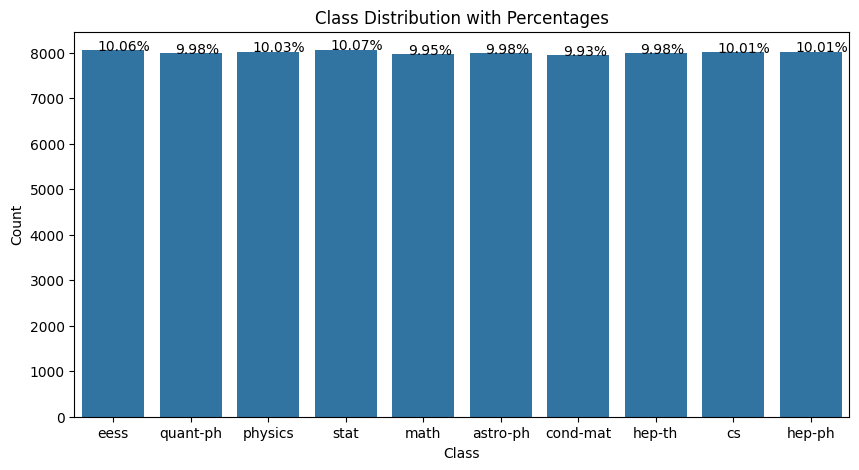

In [28]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='label', data=df)

# Annotate bars with percentage
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + 0.2, p.get_height() + 5))

plt.title("Class Distribution with Percentages")
plt.ylabel("Count")
plt.xlabel("Class")
plt.show()

## Token lenght histogram

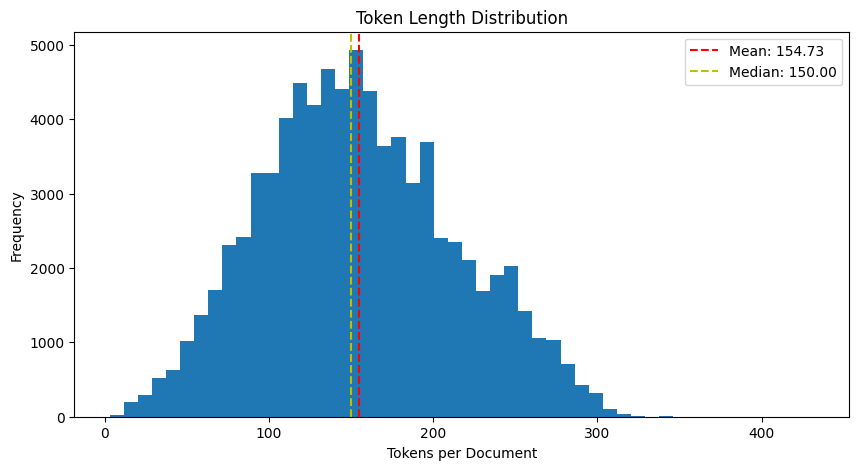

In [ ]:
token_lengths = df['abstract'].apply(lambda x: len(x.split()))
mean_len = token_lengths.mean()
median_len = token_lengths.median()

plt.figure(figsize=(10, 5))
plt.hist(token_lengths, bins=50)
plt.axvline(mean_len, color='r', linestyle='--', label=f"Mean: {mean_len:.2f}")
plt.axvline(median_len, color='y', linestyle='--', label=f"Median: {median_len:.2f}")
plt.title("Token Length Distribution")
plt.xlabel("Tokens per Document")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Word frequency analysis

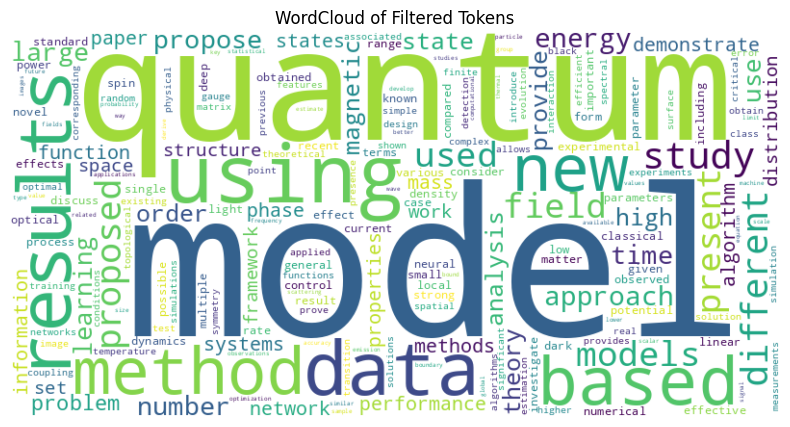

In [43]:
custom_stop_words = set(ENGLISH_STOP_WORDS).union({'et', 'al', 'fig', 'figure', 'table'})

all_tokens = []
for abstract in df['abstract']:
    tokens = abstract.lower().split()
    filtered = [token for token in tokens if token.isalpha() and token not in custom_stop_words]
    all_tokens.extend(filtered)

word_freq = Counter(all_tokens)

wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Filtered Tokens")
plt.show()

## Average document lenght

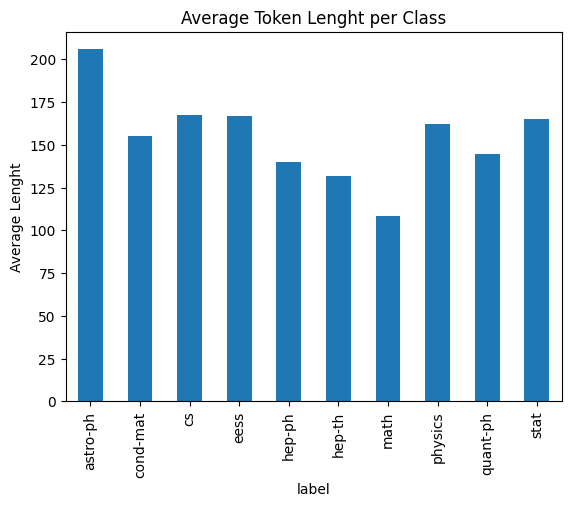

In [ ]:

df['length'] = df['abstract'].apply(lambda x: len(x.split()))
df.groupby('label')['length'].mean().plot(kind='bar')
plt.title("Average Token Lenght per Class")
plt.ylabel("Average Lenght")
plt.show()

## Average Lenght per Label

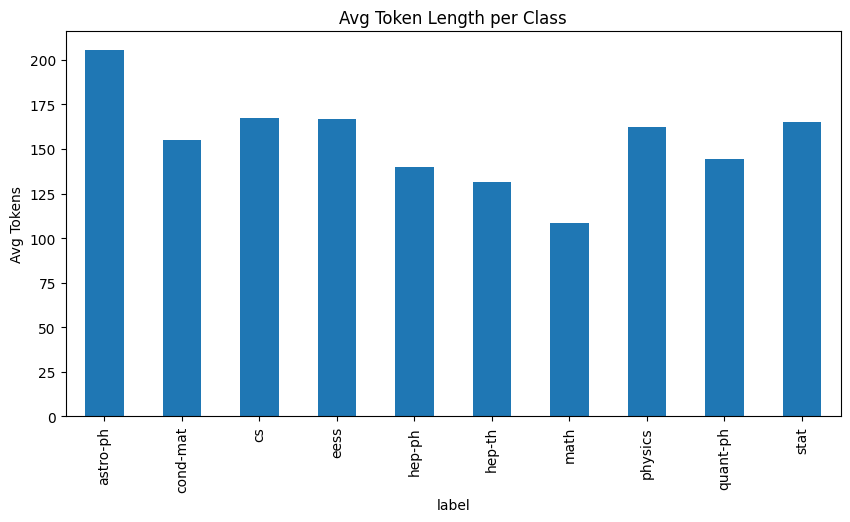

In [32]:
df["token_length"] = df["abstract"].apply(lambda x: len(x.split()))
df.groupby("label")["token_length"].mean().plot(kind="bar", figsize=(10, 5), title="Avg Token Length per Class")
plt.ylabel("Avg Tokens")
plt.show()

## Vocabulary Size

In [24]:
unique_words = set(word for text in df['abstract'] for word in text.split())
print("Vocabulary size: ", len(unique_words))

Vocabulary size:  432001


## Rare Word Proportion

In [35]:
all_words = [word for text in df["abstract"] for word in text.split()]
word_counts = Counter(all_words)

rare_words = [word for word, count in word_counts.items() if count == 1]
print(f"Rare words: {len(rare_words)} / {len(word_counts)} ({len(rare_words)/len(word_counts)*100:.2f}%)")


Rare words: 274926 / 432001 (63.64%)


## Top Tokens per Class

In [ ]:
# You can add domain-specific stop words if needed
custom_stop_words = set(ENGLISH_STOP_WORDS).union({'et', 'al', 'fig', 'figure', 'table'})  # optional add-ons

per_class_words = defaultdict(list)

for _, row in df.iterrows():
    words = row['abstract'].lower().split()
    filtered_words = [word for word in words if word not in custom_stop_words and word.isalpha()]
    per_class_words[row['label']].extend(filtered_words)

for label in per_class_words:
    print(f"\nTop tokens for class {label}:")
    print(Counter(per_class_words[label]).most_common(10))


Top tokens for class eess:
[('proposed', 6107), ('using', 4578), ('model', 4466), ('based', 4054), ('data', 4003), ('results', 3806), ('method', 3805), ('network', 3661), ('performance', 3512), ('learning', 3244)]

Top tokens for class quant-ph:
[('quantum', 23173), ('state', 3716), ('states', 3595), ('classical', 2946), ('using', 2817), ('entanglement', 2324), ('information', 2062), ('results', 2031), ('based', 1843), ('number', 1774)]

Top tokens for class physics:
[('using', 3523), ('model', 3135), ('results', 2605), ('energy', 2478), ('based', 2206), ('different', 2123), ('method', 2019), ('used', 1997), ('field', 1994), ('optical', 1990)]

Top tokens for class stat:
[('data', 7887), ('model', 6580), ('method', 4016), ('using', 3906), ('models', 3774), ('proposed', 3667), ('methods', 3295), ('approach', 3104), ('based', 3093), ('propose', 2929)]

Top tokens for class math:
[('prove', 2575), ('results', 2106), ('study', 1951), ('problem', 1617), ('paper', 1600), ('number', 1492), (

## Duplicate Check

In [39]:
df.duplicated().sum()

np.int64(0)